In [1]:
from dlisio import dlis
import numpy as np
import pandas as pd
# from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

pd.set_option('display.max_rows', 50)

# extracting lab 

In [2]:
# loading lab_data from an Excel file
name = 'HRDH_697'
lab_data = pd.read_excel("../HRDH_LAB_DATA.xlsx", sheet_name=name, index_col='Depth_ft')

lab_data


,Sample_ID,XRD_Calcite,XRD_Dolomite,XRD_Ankerite,XRD_Siderite,XRD_Quartz,XRD_Plagioclase,XRD_K-Feldspar,XRD_Illite/Mica,XRD_Smectite,...,XRF_S,XRF_Cl,XRF_K,XRF_Ca,XRF_Ti,XRF_Mn,XRF_Fe,XRF_Zr,XRF_Sr,XRF_Ba
Depth_ft,,,,,,,,,,,,,,,,,,,,,
14889.2,2,0,0,0,0,99.2,0,0.0,0.7,0,...,0.11,0.69,2.74,1.19,0.00,0,0.59,0.14,0.00,0
14893.8,3,0,0,0,0,96.1,0,0.0,3.8,0,...,0.00,1.25,5.30,1.48,0.25,0,1.14,0.08,0.00,0
14894.7,4,0,0,0,0,96.5,0,0.0,3.4,0,...,0.56,1.01,4.23,3.07,0.37,0,0.98,0.08,0.00,0
14895.3,5,0,0,0,0,95.1,0,0.0,4.8,0,...,0.11,1.14,6.24,1.19,0.70,0,1.72,0.17,0.00,0
14901.9,6,0,0,0,0,96.7,0,0.9,2.0,0,...,0.64,1.03,4.05,3.24,0.68,0,1.68,0.22,0.00,0
14903.7,7,0,0,0,0,97.4,0,0.0,2.5,0,...,0.00,0.96,4.10,0.94,0.65,0,0.80,0.16,0.00,0
14905.7,8,0,0,0,0,94.0,0,0.0,5.9,0,...,0.00,1.11,7.96,1.34,0.83,0,1.63,0.00,0.04,0
14931.5,14,0,0,0,0,92.0,0,0.0,7.9,0,...,0.15,1.33,5.96,1.68,0.86,0,1.76,0.14,0.00,0
14932.4,15,0,0,0,0,95.0,0,0.0,4.9,0,...,0.00,2.05,4.86,1.87,0.44,0,1.48,0.10,0.00,0


In [3]:
# convert data types to float
lab_data = lab_data.apply(pd.to_numeric, errors='coerce')


print("\n📋 DATAFRAME STRUCTURE:")
print(f"Index: {lab_data.index.name} (shape: {lab_data.index.shape})")
print(f"Columns: {list(lab_data.columns)} (shape: {lab_data.shape},)")
# print(f"Data types:\n{lab_data.info()}\n")


lab_data


📋 DATAFRAME STRUCTURE:
Index: Depth_ft (shape: (10,))
Columns: ['Sample_ID', 'XRD_Calcite', 'XRD_Dolomite', 'XRD_Ankerite', 'XRD_Siderite', 'XRD_Quartz', 'XRD_Plagioclase', 'XRD_K-Feldspar', 'XRD_Illite/Mica', 'XRD_Smectite', 'XRD_Kaolinite', 'XRD_Chlorite', 'XRD_Mixed Clay', 'XRD_Anhydrite', 'XRD_Gypsum', 'XRD_Pyrite', 'XRD_Hematite', 'XRF_Na', 'XRF_Mg', 'XRF_Al', 'XRF_Si', 'XRF_P', 'XRF_S', 'XRF_Cl', 'XRF_K', 'XRF_Ca', 'XRF_Ti', 'XRF_Mn', 'XRF_Fe', 'XRF_Zr', 'XRF_Sr', 'XRF_Ba'] (shape: (10, 32),)


,Sample_ID,XRD_Calcite,XRD_Dolomite,XRD_Ankerite,XRD_Siderite,XRD_Quartz,XRD_Plagioclase,XRD_K-Feldspar,XRD_Illite/Mica,XRD_Smectite,...,XRF_S,XRF_Cl,XRF_K,XRF_Ca,XRF_Ti,XRF_Mn,XRF_Fe,XRF_Zr,XRF_Sr,XRF_Ba
Depth_ft,,,,,,,,,,,,,,,,,,,,,
14889.2,2,0,0,0,0,99.2,0,0.0,0.7,0,...,0.11,0.69,2.74,1.19,0.00,0,0.59,0.14,0.00,0
14893.8,3,0,0,0,0,96.1,0,0.0,3.8,0,...,0.00,1.25,5.30,1.48,0.25,0,1.14,0.08,0.00,0
14894.7,4,0,0,0,0,96.5,0,0.0,3.4,0,...,0.56,1.01,4.23,3.07,0.37,0,0.98,0.08,0.00,0
14895.3,5,0,0,0,0,95.1,0,0.0,4.8,0,...,0.11,1.14,6.24,1.19,0.70,0,1.72,0.17,0.00,0
14901.9,6,0,0,0,0,96.7,0,0.9,2.0,0,...,0.64,1.03,4.05,3.24,0.68,0,1.68,0.22,0.00,0
14903.7,7,0,0,0,0,97.4,0,0.0,2.5,0,...,0.00,0.96,4.10,0.94,0.65,0,0.80,0.16,0.00,0
14905.7,8,0,0,0,0,94.0,0,0.0,5.9,0,...,0.00,1.11,7.96,1.34,0.83,0,1.63,0.00,0.04,0
14931.5,14,0,0,0,0,92.0,0,0.0,7.9,0,...,0.15,1.33,5.96,1.68,0.86,0,1.76,0.14,0.00,0
14932.4,15,0,0,0,0,95.0,0,0.0,4.9,0,...,0.00,2.05,4.86,1.87,0.44,0,1.48,0.10,0.00,0


# extracting log dlis

In [4]:
from Module import load_full_dsl_log, dlis_to_df
import os
from pathlib import Path
import traceback
import glob
import pandas as pd

def load_full_dsl_log(
    
    
    
    root_dir: str,
    channels: list[str] | None = None,
    frame_idx: int = 0,
    priority_folders: list[str] | None = None
) -> tuple[pd.DataFrame, dict]:
    """
    Discover, filter, load, and concatenate DSL-based DLIS files into one continuous log.

    Args:
        root_dir: Root directory to search for .dlis files.
        channels: List of curve mnemonics to extract (None => all).
        frame_idx: Frame index to use for each DLIS.
        priority_folders: Ordered list of folder names to prefer when duplicates exist.

    Returns:
        full_log: DataFrame indexed by depth with concatenated log curves.
        metadata: Dictionary containing detailed loading information.
    """
    # 1. Discover all DLIS files
    found_files = glob.glob(f"{root_dir}/**/*.dlis", recursive=True)
    print(f"🔍 Found {len(found_files)} total DLIS files")

    # 2. Filter to DSL files only
    dsl_files = [f for f in found_files if "-DSL" in Path(f).stem]
    print(f"📊 Found {len(dsl_files)} DSL-specific files")

    if len(dsl_files) == 0:
        print("❌ No DSL files found!")
        return pd.DataFrame(), {"error": "No DSL files found"}

    # 3. Group by file stem to find duplicates
    stems = {}
    for f in dsl_files:
        stem = Path(f).stem
        stems.setdefault(stem, []).append(f)

    # 4. Select one file per stem based on priority_folders
    selected_files = []
    ignored_duplicates = []
    if priority_folders is None:
        priority_folders = ["Deliverables", "FJA"]

    for stem, files in stems.items():
        if len(files) > 1:
            print(f"🔄 Multiple files found for {stem}: {len(files)} files")
            
        # pick highest-priority file
        selected = None
        for folder in priority_folders:
            for f in files:
                if folder in f:
                    selected = f
                    print(f"✅ Selected {Path(f).name} (priority: {folder})")
                    break
            if selected:
                break
        if not selected:
            selected = files[0]
            print(f"⚠️ No priority match for {stem}, using first file: {Path(selected).name}")
            
        selected_files.append(selected)
        # record ignored duplicates
        ignored_duplicates.extend([f for f in files if f != selected])

    print(f"📁 Selected {len(selected_files)} files for loading")
    print(f"🗑️ Ignored {len(ignored_duplicates)} duplicate files")

    # 5. Load each selected file into a DataFrame - FIXED PARAMETER NAMES
    dfs = []
    load_meta = []
    
    for i, f in enumerate(selected_files):
        try:
            print(f"\n🔧 Loading file {i+1}/{len(selected_files)}: {Path(f).name}")
            
            # FIXED: Use correct parameter names matching your Module's dlis_to_df function
            # Parameters: ['path', 'needed', 'frame_index', 'verbose']
            df = dlis_to_df(
                path=f, 
                needed=channels,        # FIXED: Use 'needed' instead of 'channels'
                frame_index=frame_idx,  # FIXED: Use 'frame_index' instead of 'frame_idx'
                verbose=True            # FIXED: Add verbose parameter
            )
            
            # Handle the case where your function might return tuple or just DataFrame
            if isinstance(df, tuple):
                df, meta = df
                load_meta.append(meta)
            else:
                # If no metadata returned, create basic metadata
                meta = {
                    'path': f,
                    'shape': df.shape,
                    'columns': list(df.columns) if not df.empty else [],
                    'depth_range': (df.index.min(), df.index.max()) if not df.empty else (None, None)
                }
                load_meta.append(meta)
            
            if not df.empty:
                print(f"✅ Loaded: {df.shape[0]} samples × {df.shape[1]} channels")
                print(f"   Depth range: {df.index.min():.1f} - {df.index.max():.1f} ft")
                dfs.append(df)
            else:
                print(f"⚠️ Empty DataFrame returned for {Path(f).name}")
                
        except Exception as e:
            print(f"❌ Error loading {Path(f).name}: {e}")
            # Print more detailed error for debugging
            import traceback
            print(f"   Full error: {traceback.format_exc()}")
            continue

    # 6. Concatenate and deduplicate by depth index
    if dfs:
        print(f"\n🔗 Concatenating {len(dfs)} DataFrames...")
        
        # Concatenate with error handling
        try:
            full_log = pd.concat(dfs, sort=True).sort_index()
            
            # Check for depth duplicates
            duplicates_before = full_log.index.duplicated().sum()
            if duplicates_before > 0:
                print(f"⚠️ Found {duplicates_before} duplicate depths, removing...")
                full_log = full_log[~full_log.index.duplicated(keep='first')]
                
            print(f"✅ Final combined log: {full_log.shape[0]} samples × {full_log.shape[1]} channels")
            print(f"   Combined depth range: {full_log.index.min():.1f} - {full_log.index.max():.1f} ft")
            
        except Exception as e:
            print(f"❌ Error concatenating DataFrames: {e}")
            full_log = pd.DataFrame()
    else:
        print("❌ No valid DataFrames to concatenate")
        full_log = pd.DataFrame()

    # 7. Compile metadata
    metadata = {
        "found_files": found_files,
        "dsl_files": dsl_files,
        "selected_files": selected_files,
        "ignored_duplicates": ignored_duplicates,
        "load_meta": load_meta,
        "summary": {
            "total_files_found": len(found_files),
            "dsl_files_found": len(dsl_files),
            "files_loaded": len(dfs),
            "files_failed": len(selected_files) - len(dfs),
            "final_shape": full_log.shape if not full_log.empty else (0, 0)
        }
    }

    return full_log, metadata

# Path to the DLIS log file 
dir_path = r"\\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_697_0"


log_df, meta = load_full_dsl_log(
    root_dir=dir_path,
    frame_idx=0,
    channels=None  
)

# Display summary
print(f"\n📊 LOADING SUMMARY:")
print(f"   • Files found: {meta['summary']['total_files_found']}")
print(f"   • DSL files: {meta['summary']['dsl_files_found']}")
print(f"   • Successfully loaded: {meta['summary']['files_loaded']}")
print(f"   • Failed to load: {meta['summary']['files_failed']}")
print(f"   • Final shape: {meta['summary']['final_shape']}")

if not log_df.empty:
    print(f"   • Depth range: {log_df.index.min():.1f} - {log_df.index.max():.1f} ft")
    print(f"   • Available channels: {list(log_df.columns)}")
else:
    print("   • No data loaded - check errors above")

log_df    

🔍 Found 62 total DLIS files
📊 Found 7 DSL-specific files
✅ Selected HRDH_697_0_15OCT2011_ZDL1-ZDL2-CN-DSL-GR_ML_BA.dlis (priority: Deliverables)
✅ Selected HRDH_697_0_15OCT2011_ZDL1-ZDL2-CN-DSL-GR_RP_BA.dlis (priority: Deliverables)
✅ Selected HRDH_697_0_17OCT2011_ZDL-ZDL-CN-DSL_ML_BA.dlis (priority: FJA)
✅ Selected HRDH_697_0_17OCT2011_ZDL-ZDL-CN-DSL_RPT_BA.dlis (priority: FJA)
✅ Selected HRDH_697_0_09JAN2012_ZDL-CN-DSL_ML_BA.dlis (priority: Deliverables)
✅ Selected HRDH_697_0_27OCT2011_ZDL-CN-DSL-GR_ML_BA.dlis (priority: Deliverables)
✅ Selected HRDH_697_0_27OCT2011_ZDL-CNC-DSL-GR-CAL_ML_BA.dlis (priority: FJA)
📁 Selected 7 files for loading
🗑️ Ignored 0 duplicate files

🔧 Loading file 1/7: HRDH_697_0_15OCT2011_ZDL1-ZDL2-CN-DSL-GR_ML_BA.dlis
🔍 STEP 1: FILE VALIDATION
✅ File found: HRDH_697_0_15OCT2011_ZDL1-ZDL2-CN-DSL-GR_ML_BA.dlis
   • Size: 24.5 MB
   • Path: \\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_697_0\12\WL\Field\Deliver

,BIT,BVOL,CALZ,CALZ1,CALZ2,CHT.I,CN,CNC,CVOL,FRAMENO,...,TH,TTEN,U,WTBH,ZCOR,ZCOR2,ZDEN,ZDEN2,ZDNC,ZDNC2
TDEP,,,,,,,,,,,,,,,,,,,,,
10650.00,12.00,NaN,NaN,NaN,NaN,NaN,50.388222,46.016716,NaN,1,...,3.024863,4383.399414,0.259066,NaN,-1.048316,-1.020690,2.199538,2.208459,2.190785,2.199453
10650.25,12.00,NaN,NaN,NaN,NaN,NaN,51.322247,46.949982,NaN,2,...,3.163477,4387.063965,0.284641,NaN,-1.053843,-1.016716,2.181385,2.211883,2.172793,2.202846
10650.50,12.00,NaN,NaN,NaN,NaN,NaN,52.472614,48.105431,NaN,3,...,3.293651,4391.781738,0.302876,NaN,-1.056162,-1.010766,2.171753,2.220564,2.163249,2.211453
10650.75,12.00,NaN,NaN,NaN,NaN,NaN,53.505451,49.148567,NaN,4,...,3.400888,4395.671387,0.314478,NaN,-1.054782,-1.002663,2.171503,2.235335,2.163001,2.226102
10651.00,12.00,NaN,NaN,NaN,NaN,NaN,53.565109,49.207821,NaN,5,...,3.498562,4397.529785,0.322099,NaN,-1.049812,-0.992796,2.179741,2.255228,2.171164,2.245839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19134.00,-999.25,NaN,NaN,NaN,NaN,-999.25,-999.250000,-999.250000,NaN,9639,...,-999.250000,NaN,-999.250000,-999.25,-999.250000,NaN,-999.250000,NaN,-999.250000,NaN
19134.50,-999.25,NaN,NaN,NaN,NaN,-999.25,-999.250000,-999.250000,NaN,9640,...,-999.250000,NaN,-999.250000,-999.25,-999.250000,NaN,-999.250000,NaN,-999.250000,NaN
19135.00,-999.25,NaN,NaN,NaN,NaN,-999.25,-999.250000,-999.250000,NaN,9641,...,-999.250000,NaN,-999.250000,-999.25,-999.250000,NaN,-999.250000,NaN,-999.250000,NaN


In [5]:
# You now have a complete log dataset:
print(f"📊 Final log data: {log_df.shape}")
print(f"📏 Depth coverage: {log_df.index.min():.1f} - {log_df.index.max():.1f} ft")
print(f"🔍 Available channels: {len(log_df.columns)} {list(log_df.columns)}")

📊 Final log data: (25178, 45)
📏 Depth coverage: 10650.0 - 19136.0 ft
🔍 Available channels: 45 ['BIT', 'BVOL', 'CALZ', 'CALZ1', 'CALZ2', 'CHT.I', 'CN', 'CNC', 'CVOL', 'FRAMENO', 'GR', 'GRSL', 'HRD1', 'HRD12', 'HRD2', 'K', 'KTH', 'LSN', 'PE', 'PE2', 'QPKS', 'RTHK', 'RTHU', 'RUK', 'SFT2', 'SFT22', 'SHR', 'SHR2', 'SLGN', 'SLTM', 'SPD', 'SSD', 'SSD2', 'SSN', 'TEN', 'TH', 'TTEN', 'U', 'WTBH', 'ZCOR', 'ZCOR2', 'ZDEN', 'ZDEN2', 'ZDNC', 'ZDNC2']


# cleaning log

In [6]:

# -999.25 are usually null values inside dlis files
null_values = -999.25

# Replace -999.25 with NaN FIRST
log_df_clean = log_df.replace(null_values, np.nan)
log_df_clean




,BIT,BVOL,CALZ,CALZ1,CALZ2,CHT.I,CN,CNC,CVOL,FRAMENO,...,TH,TTEN,U,WTBH,ZCOR,ZCOR2,ZDEN,ZDEN2,ZDNC,ZDNC2
TDEP,,,,,,,,,,,,,,,,,,,,,
10650.00,12.0,NaN,NaN,NaN,NaN,NaN,50.388222,46.016716,NaN,1,...,3.024863,4383.399414,0.259066,NaN,-1.048316,-1.020690,2.199538,2.208459,2.190785,2.199453
10650.25,12.0,NaN,NaN,NaN,NaN,NaN,51.322247,46.949982,NaN,2,...,3.163477,4387.063965,0.284641,NaN,-1.053843,-1.016716,2.181385,2.211883,2.172793,2.202846
10650.50,12.0,NaN,NaN,NaN,NaN,NaN,52.472614,48.105431,NaN,3,...,3.293651,4391.781738,0.302876,NaN,-1.056162,-1.010766,2.171753,2.220564,2.163249,2.211453
10650.75,12.0,NaN,NaN,NaN,NaN,NaN,53.505451,49.148567,NaN,4,...,3.400888,4395.671387,0.314478,NaN,-1.054782,-1.002663,2.171503,2.235335,2.163001,2.226102
10651.00,12.0,NaN,NaN,NaN,NaN,NaN,53.565109,49.207821,NaN,5,...,3.498562,4397.529785,0.322099,NaN,-1.049812,-0.992796,2.179741,2.255228,2.171164,2.245839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19134.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9639,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19134.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19135.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9641,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# DEPTH ANALYSIS: Compare sampling characteristics between log and lab data
print("=" * 50)

print("Log depths summary:")
print(f"Count: {len(log_df_clean.index)}")  
print(f"Range: {log_df_clean.index.min():.1f} - {log_df_clean.index.max():.1f} ft\n")  
log_step = np.diff(log_df_clean.index).mean()  
print(f"Depth step (mean): {log_step:.2f} ft \nMin Step: {np.diff(log_df_clean.index).min():.2f} \nMax Step: {np.diff(log_df_clean.index).max():.2f}")  


print("=" * 50)


print("Lab depths summary:")
print(f"Count: {len(lab_data.index)}") 
print(f"Range: {lab_data.index.min():.1f} - {lab_data.index.max():.1f} ft\n")  
lab_step = np.diff(lab_data.index).mean()  
print(f"Depth step (mean): {lab_step:.2f} ft \nMin Step: {np.diff(lab_data.index).min():.2f} \nMax Step: {np.diff(lab_data.index).max():.2f}")  


Log depths summary:
Count: 25178
Range: 10650.0 - 19136.0 ft

Depth step (mean): 0.34 ft 
Min Step: 0.25 
Max Step: 0.50
Lab depths summary:
Count: 10
Range: 14889.2 - 14938.5 ft

Depth step (mean): 5.48 ft 
Min Step: 0.60 
Max Step: 25.80


# Log MISSING DATA SUMMARY

In [8]:
#Missing Data Summary for log data
# Calculate missingness summary
null_pct = log_df_clean.isna().mean() * 100

# Show all columns with their percentages
missing_cols = null_pct.sort_values(ascending=False)

# Show aggregate summary statistics for many columns
print("🔍 MISSING DATA SUMMARY:")
print("=" * 50)
print(f"Log DATASET: {log_df_clean.shape[0]} samples × {log_df_clean.shape[1]} curves")

print(f"Total columns: {len(null_pct)}")
print(f"Columns with missing data: {len(missing_cols)}")
print(f"Max missing %: {null_pct.max():.1f}%")
print(f"Avg missing %: {null_pct.mean():.1f}%")

# Quick check for duplicates
# print("\n🔍 DUPLICATE DEPTH CHECK:")
# print(f"Log duplicates: {log_df_clean.index.duplicated().sum()}")
# print(f"Lab duplicates: {lab_data.index.duplicated().sum()}")

# # Show unique vs total counts
# print(f"\nLog depths - Total: {len(log_df_clean)}, Unique: {log_df_clean.index.nunique()}")
# print(f"Lab depths - Total: {len(lab_data)}, Unique: {lab_data.index.nunique()}")

print("=" * 50)


# Show detailed breakdown for all columns
for col, pct in missing_cols.items():
    count = log_df_clean[col].isna().sum()
    print(f"• {col:<20}: {pct:>6.1f}% ({count} missing)")




🔍 MISSING DATA SUMMARY:
Log DATASET: 25178 samples × 45 curves
Total columns: 45
Columns with missing data: 45
Max missing %: 100.0%
Avg missing %: 25.2%
• WTBH                :  100.0% (25178 missing)
• CALZ                :   98.0% (24686 missing)
• BVOL                :   97.2% (24462 missing)
• CVOL                :   97.2% (24462 missing)
• CALZ1               :   70.9% (17842 missing)
• CALZ2               :   70.7% (17797 missing)
• CHT.I               :   64.1% (16135 missing)
• HRD2                :   62.6% (15774 missing)
• ZDEN2               :   39.0% (9819 missing)
• PE2                 :   39.0% (9819 missing)
• ZDNC2               :   39.0% (9819 missing)
• ZCOR2               :   39.0% (9819 missing)
• HRD12               :   39.0% (9818 missing)
• SFT22               :   39.0% (9818 missing)
• SHR2                :   39.0% (9818 missing)
• SSD2                :   39.0% (9813 missing)
• SPD                 :   36.0% (9072 missing)
• TEN                 :   36.0% (9071 m

# OVERLAP

In [9]:
# OVERLAP ZONE ANALYSIS: Identify common depth intervals for data integration
print("🔍 DETAILED OVERLAP ZONE ANALYSIS:")
print("=" * 50)

# Dataset coverage comparison
print(f"📏 Depth Ranges:")
print(f"Log Range: {log_df.index.min():.1f} - {log_df.index.max():.1f} ft")  
print(f"Lab Range: {lab_data.index.min():.1f} - {lab_data.index.max():.1f} ft")  

# Calculate overlap zone boundaries
overlap_start = max(lab_data.index.min(), log_df_clean.index.min())
overlap_end = min(lab_data.index.max(), log_df_clean.index.max())
overlap_span = overlap_end - overlap_start

print("=" * 50)

print(f"Overlap Range: {overlap_start:.1f} - {overlap_end:.1f} ft")
print(f"Span of overlap: {overlap_span:.1f} ft")

# Coverage percentages
lab_total_span = lab_data.index.max() - lab_data.index.min()
log_total_span = log_df_clean.index.max() - log_df_clean.index.min()
overlap_lab_pct = (overlap_span / lab_total_span) * 100
overlap_log_pct = (overlap_span / log_total_span) * 100

print(f"Coverage: {overlap_lab_pct:.1f}% of lab data, {overlap_log_pct:.1f}% of log data")
print("=" * 50)

# Get samples in overlap zone
log_overlap = log_df_clean[(log_df_clean.index >= overlap_start) & (log_df_clean.index <= overlap_end)]
lab_overlap = lab_data[(lab_data.index >= overlap_start) & (lab_data.index <= overlap_end)]

# Calculate Step statistics in overlap zone
if len(log_overlap) > 1:
    log_step_overlap = np.diff(log_overlap.index)
    print(f"LOG STEP IN OVERLAP:")
    print(f"Step (mean): {log_step_overlap.mean():.2f} ft")
    print(f"Min: {log_step_overlap.min():.2f} ft \nStep Max: {log_step_overlap.max():.2f}")
    # print(f"Step Std: {log_step_overlap.std():.2f} ft")

if len(lab_overlap) > 1:
    lab_step_overlap = np.diff(lab_overlap.index)
    print(f"\nLAB STEP IN OVERLAP:")
    print(f"Step (mean): {lab_step_overlap.mean():.2f} ft")
    print(f"Min: {lab_step_overlap.min():.2f} ft \nStep Max: {lab_step_overlap.min():.2f}")
    # print(f"Step Std: {lab_step_overlap.std():.2f} ft")

print("=" * 50)

# Show actual depths in overlap zone
print(f"📍 SAMPLE DEPTHS IN OVERLAP ZONE:")
print(f"🔵 Log depths (first/last 5 of {len(log_overlap):,}):")
if len(log_overlap) > 0:
    # Show first 5
    for i, depth in enumerate(log_overlap.index[:5]):
        print(f"   {i+1:2d}. {depth:.2f} ft")
    if len(log_overlap) > 10:
        print("   ...")
        # Show last 5
        for i, depth in enumerate(log_overlap.index[-5:], start=len(log_overlap)-4):
            print(f"  {i:2d}. {depth:.2f} ft")

print(f"🔴 Lab depths (all {len(lab_overlap)}):")
if len(lab_overlap) > 0:
    for i, depth in enumerate(lab_overlap.index):
        print(f"   {i+1:2d}. {depth:.1f} ft")

#display depths in a df
# Display lab_overlap and log_df_clean side by side for the overlap zone

print("Lab Overlap Samples:")
display(lab_overlap)

print("Log Data:")
display(log_df_clean.loc[log_df_clean.index])

# Data quality assessment for overlap zone
# print(f"\n⭐ OVERLAP ZONE ASSESSMENT:")
# if overlap_span >= 100:
#     print(f"✅ Overlap span: EXCELLENT ({overlap_span:.1f} ft)")
# elif overlap_span >= 50:
#     print(f"⚠️ Overlap span: GOOD ({overlap_span:.1f} ft)")
# else:
#     print(f"❌ Overlap span: POOR ({overlap_span:.1f} ft)")

# if len(lab_overlap) >= 5:
#     print(f"✅ Lab samples: SUFFICIENT ({len(lab_overlap)} samples)")
# elif len(lab_overlap) >= 3:
#     print(f"⚠️ Lab samples: LIMITED ({len(lab_overlap)} samples)")
# else:
#     print(f"❌ Lab samples: INSUFFICIENT ({len(lab_overlap)} samples)")

# if len(log_overlap) >= 100:
#     print(f"✅ Log samples: EXCELLENT ({len(log_overlap):,} samples)")
# elif len(log_overlap) >= 50:
#     print(f"⚠️ Log samples: GOOD ({len(log_overlap)} samples)")
# else:
#     print(f"❌ Log samples: POOR ({len(log_overlap)} samples)")

# Recommendations based on overlap analysis
# print(f"\n💡 OVERLAP RECOMMENDATIONS:")
# if overlap_span < 50:
#     print(f"Consider requesting more lab samples in {overlap_start:.0f}-{overlap_end:.0f} ft zone")
# if len(lab_overlap) < 3:
#     print(f"Minimum 3-5 lab samples needed for reliable")
# if overlap_log_pct < 20:
#     print(f"Overlap covers only {overlap_log_pct:.1f}% of log data - limited analysis scope")
# if overlap_lab_pct < 50:
#     print(f"Consider expanding log coverage to match lab sampling range")

# print(f"\n📊 INTEGRATION POTENTIAL:")
# integration_score = (min(overlap_span/100, 1) * 0.4 + 
#                     min(len(lab_overlap)/5, 1) * 0.3 + 
#                     min(len(log_overlap)/100, 1) * 0.3) * 100

# if integration_score >= 80:
#     print(f"🟢 EXCELLENT ({integration_score:.0f}/100) - Ready for comprehensive analysis")
# elif integration_score >= 60:
#     print(f"🟡 GOOD ({integration_score:.0f}/100) - Suitable for targeted analysis")
# else:
#     print(f"🔴 POOR ({integration_score:.0f}/100) - Limited analysis potential")


🔍 DETAILED OVERLAP ZONE ANALYSIS:
📏 Depth Ranges:
Log Range: 10650.0 - 19136.0 ft
Lab Range: 14889.2 - 14938.5 ft
Overlap Range: 14889.2 - 14938.5 ft
Span of overlap: 49.3 ft
Coverage: 100.0% of lab data, 0.6% of log data
LOG STEP IN OVERLAP:
Step (mean): 0.50 ft
Min: 0.50 ft 
Step Max: 0.50

LAB STEP IN OVERLAP:
Step (mean): 5.48 ft
Min: 0.60 ft 
Step Max: 0.60
📍 SAMPLE DEPTHS IN OVERLAP ZONE:
🔵 Log depths (first/last 5 of 99):
    1. 14889.50 ft
    2. 14890.00 ft
    3. 14890.50 ft
    4. 14891.00 ft
    5. 14891.50 ft
   ...
  95. 14936.50 ft
  96. 14937.00 ft
  97. 14937.50 ft
  98. 14938.00 ft
  99. 14938.50 ft
🔴 Lab depths (all 10):
    1. 14889.2 ft
    2. 14893.8 ft
    3. 14894.7 ft
    4. 14895.3 ft
    5. 14901.9 ft
    6. 14903.7 ft
    7. 14905.7 ft
    8. 14931.5 ft
    9. 14932.4 ft
   10. 14938.5 ft
Lab Overlap Samples:


,Sample_ID,XRD_Calcite,XRD_Dolomite,XRD_Ankerite,XRD_Siderite,XRD_Quartz,XRD_Plagioclase,XRD_K-Feldspar,XRD_Illite/Mica,XRD_Smectite,...,XRF_S,XRF_Cl,XRF_K,XRF_Ca,XRF_Ti,XRF_Mn,XRF_Fe,XRF_Zr,XRF_Sr,XRF_Ba
Depth_ft,,,,,,,,,,,,,,,,,,,,,
14889.2,2,0,0,0,0,99.2,0,0.0,0.7,0,...,0.11,0.69,2.74,1.19,0.00,0,0.59,0.14,0.00,0
14893.8,3,0,0,0,0,96.1,0,0.0,3.8,0,...,0.00,1.25,5.30,1.48,0.25,0,1.14,0.08,0.00,0
14894.7,4,0,0,0,0,96.5,0,0.0,3.4,0,...,0.56,1.01,4.23,3.07,0.37,0,0.98,0.08,0.00,0
14895.3,5,0,0,0,0,95.1,0,0.0,4.8,0,...,0.11,1.14,6.24,1.19,0.70,0,1.72,0.17,0.00,0
14901.9,6,0,0,0,0,96.7,0,0.9,2.0,0,...,0.64,1.03,4.05,3.24,0.68,0,1.68,0.22,0.00,0
14903.7,7,0,0,0,0,97.4,0,0.0,2.5,0,...,0.00,0.96,4.10,0.94,0.65,0,0.80,0.16,0.00,0
14905.7,8,0,0,0,0,94.0,0,0.0,5.9,0,...,0.00,1.11,7.96,1.34,0.83,0,1.63,0.00,0.04,0
14931.5,14,0,0,0,0,92.0,0,0.0,7.9,0,...,0.15,1.33,5.96,1.68,0.86,0,1.76,0.14,0.00,0
14932.4,15,0,0,0,0,95.0,0,0.0,4.9,0,...,0.00,2.05,4.86,1.87,0.44,0,1.48,0.10,0.00,0


Log Data:


,BIT,BVOL,CALZ,CALZ1,CALZ2,CHT.I,CN,CNC,CVOL,FRAMENO,...,TH,TTEN,U,WTBH,ZCOR,ZCOR2,ZDEN,ZDEN2,ZDNC,ZDNC2
TDEP,,,,,,,,,,,,,,,,,,,,,
10650.00,12.0,NaN,NaN,NaN,NaN,NaN,50.388222,46.016716,NaN,1,...,3.024863,4383.399414,0.259066,NaN,-1.048316,-1.020690,2.199538,2.208459,2.190785,2.199453
10650.25,12.0,NaN,NaN,NaN,NaN,NaN,51.322247,46.949982,NaN,2,...,3.163477,4387.063965,0.284641,NaN,-1.053843,-1.016716,2.181385,2.211883,2.172793,2.202846
10650.50,12.0,NaN,NaN,NaN,NaN,NaN,52.472614,48.105431,NaN,3,...,3.293651,4391.781738,0.302876,NaN,-1.056162,-1.010766,2.171753,2.220564,2.163249,2.211453
10650.75,12.0,NaN,NaN,NaN,NaN,NaN,53.505451,49.148567,NaN,4,...,3.400888,4395.671387,0.314478,NaN,-1.054782,-1.002663,2.171503,2.235335,2.163001,2.226102
10651.00,12.0,NaN,NaN,NaN,NaN,NaN,53.565109,49.207821,NaN,5,...,3.498562,4397.529785,0.322099,NaN,-1.049812,-0.992796,2.179741,2.255228,2.171164,2.245839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19134.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9639,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19134.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19135.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9641,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# join

In [10]:
from scipy.spatial import cKDTree
import numpy as np
import pandas as pd
from Module import match_lab_to_log

# Test with very strict tolerance first
tolerance_ft = 1

joined = match_lab_to_log(log_df_clean, lab_overlap, tol=tolerance_ft)

if len(joined) > 0:
    print(f"\n✅ Found {len(joined)} matches with {tolerance_ft} ft tolerance")
    
    # Show statistics
    print(f"\nMATCH STATISTICS:")
    print(f"Average distance: {joined['Distance'].mean():.3f} ft")
    print(f"Max distance: {joined['Distance'].max():.3f} ft")
    print(f"Exact matches: {(joined['Distance'] == 0).sum()}")
    print(f"Near matches: {(joined['Distance'] > 0).sum()}")
    
    # Save results for verification
    verification_df = joined[['Lab_Depth', 'Log_Depth', 'Distance']].copy()
    verification_df.to_csv('verification_matches.csv', index=False)
    print(f"\n💾 Saved verification data to 'verification_matches.csv'")
    
else:
    print(f"\n❌ No matches found with {tolerance_ft} ft tolerance")
    print("Trying with larger tolerance...")
    
    # Try with 1 ft tolerance
    joined = match_lab_to_log(log_df_clean, lab_overlap, tol=1)

joined


FUNCTION START - INPUT VALIDATION:
   • Log DataFrame shape: (25178, 45)
   • Lab DataFrame shape: (10, 32)
   • After deduplication - Log: 25178, Lab: 10
   • Lab depths range: 14889.20 - 14938.50
   • Log depths range: 10650.00 - 19136.00
   • Tolerance: 1 ft
   • Valid matches found: 10/10
   • Min distance: 0.00 ft
   • Max distance: 0.20 ft

MATCH VERIFICATION:
   Match 1: Lab 14889.20 → Log 14889.00 (Δ0.20 ft)
   Match 2: Lab 14893.80 → Log 14894.00 (Δ0.20 ft)
   Match 3: Lab 14894.70 → Log 14894.50 (Δ0.20 ft)
   Match 4: Lab 14895.30 → Log 14895.50 (Δ0.20 ft)
   Match 5: Lab 14901.90 → Log 14902.00 (Δ0.10 ft)
   Match 6: Lab 14903.70 → Log 14903.50 (Δ0.20 ft)
   Match 7: Lab 14905.70 → Log 14905.50 (Δ0.20 ft)
   Match 8: Lab 14931.50 → Log 14931.50 (Δ0.00 ft)
   Match 9: Lab 14932.40 → Log 14932.50 (Δ0.10 ft)
   Match 10: Lab 14938.50 → Log 14938.50 (Δ0.00 ft)
   • Matched samples extracted: 10 pairs

✅ Found 10 matches with 1 ft tolerance

MATCH STATISTICS:
Average distance: 0

,Lab_Depth,Lab_Sample_ID,Lab_XRD_Calcite,Lab_XRD_Dolomite,Lab_XRD_Ankerite,Lab_XRD_Siderite,Lab_XRD_Quartz,Lab_XRD_Plagioclase,Lab_XRD_K-Feldspar,Lab_XRD_Illite/Mica,...,Log_U,Log_WTBH,Log_ZCOR,Log_ZCOR2,Log_ZDEN,Log_ZDEN2,Log_ZDNC,Log_ZDNC2,Distance,Match_Type
0,14889.2,2,0,0,0,0,99.2,0,0.0,0.7,...,8.852848,NaN,-0.065304,NaN,2.501206,NaN,2.490906,NaN,0.2,Near
1,14893.8,3,0,0,0,0,96.1,0,0.0,3.8,...,8.081790,NaN,-0.088089,NaN,2.434864,NaN,2.424978,NaN,0.2,Near
2,14894.7,4,0,0,0,0,96.5,0,0.0,3.4,...,8.290098,NaN,-0.080392,NaN,2.451017,NaN,2.441028,NaN,0.2,Near
3,14895.3,5,0,0,0,0,95.1,0,0.0,4.8,...,9.072144,NaN,-0.049249,NaN,2.506464,NaN,2.496131,NaN,0.2,Near
4,14901.9,6,0,0,0,0,96.7,0,0.9,2.0,...,8.525779,NaN,-0.042403,NaN,2.498839,NaN,2.488553,NaN,0.1,Near
5,14903.7,7,0,0,0,0,97.4,0,0.0,2.5,...,9.923880,NaN,-0.044524,NaN,2.493208,NaN,2.482956,NaN,0.2,Near
6,14905.7,8,0,0,0,0,94.0,0,0.0,5.9,...,10.382340,NaN,-0.032361,NaN,2.427736,NaN,2.417896,NaN,0.2,Near
7,14931.5,14,0,0,0,0,92.0,0,0.0,7.9,...,8.952220,NaN,-0.059618,NaN,2.473074,NaN,2.462947,NaN,0.0,Exact
8,14932.4,15,0,0,0,0,95.0,0,0.0,4.9,...,10.230805,NaN,-0.062772,NaN,2.478785,NaN,2.468622,NaN,0.1,Near
9,14938.5,17,0,0,0,0,95.0,0,0.0,4.9,...,9.860523,NaN,-0.011614,NaN,2.532634,NaN,2.522145,NaN,0.0,Exact


# DATA INTEGRATION ASSESSMENT

In [11]:
# COMPREHENSIVE DATA INTEGRATION ASSESSMENT
print("COMPREHENSIVE DATA INTEGRATION ASSESSMENT")
print("=" * 60)

# 1. Basic Statistics
lab_coverage = (len(joined) / len(lab_data)) * 100
log_coverage = (len(joined) / len(log_df_clean)) * 100

lab_span = lab_data.index.max() - lab_data.index.min()
log_span = log_df_clean.index.max() - log_df_clean.index.min()

matched_span = joined['Lab_Depth'].max() - joined['Lab_Depth'].min()
avg_depth_diff = abs(joined['Log_Depth'] - joined['Lab_Depth']).mean()

print(f"📊 DATA OVERVIEW:")
print(f"   • Lab samples: {len(lab_data)} | Log samples: {len(log_df_clean)}")
print(f"   • Matched pairs: {len(joined)}")
# print(f"   • Data ratio: 1 lab sample per {len(log_df_clean)//len(lab_data)} log samples") not usful

# 2. Coverage Analysis
print(f"\n📈 COVERAGE ANALYSIS:")
print(f"   • Lab utilization: {lab_coverage:.1f}% ({len(joined)}/{len(lab_data)})")
print(f"   • Log coverage: {log_coverage:.1f}% ({len(joined)}/{len(log_df_clean)})")

# 3. Depth Range Analysis
print(f"\n📏 DEPTH RANGE ANALYSIS:")
print(f"   • Lab data span: {lab_span:.1f} ft")
print(f"   • Log data span: {log_span:.1f} ft")
print(f"   • Matched (joined) span: {matched_span:.1f} ft")
print(f"   • Lab covers {(lab_span/log_span)*100:.1f}% of well depth")

# 4. Depth Accuracy
print(f"\n🎯 DEPTH ACCURACY:")
print(f"   • Average depth difference: {avg_depth_diff:.2f} ft")
print(f"   • Max depth difference: {abs(joined['Log_Depth'] - joined['Lab_Depth']).max():.2f} ft")
print(f"   • Min depth difference: {abs(joined['Log_Depth'] - joined['Lab_Depth']).min():.2f} ft")


# 6. Overlap Analysis
overlap_start = max(lab_data.index.min(), log_df_clean.index.min())
overlap_end = min(lab_data.index.max(), log_df_clean.index.max())
overlap_span = overlap_end - overlap_start
print(f"\n🔄 OVERLAP ZONE ANALYSIS:")
print(f"Overlap zone: {overlap_start:.1f} - {overlap_end:.1f} ft")

# Get samples in overlap zone - FIXED the bug
log_overlap = joined[(joined.index >= overlap_start) & (joined.index <= overlap_end)]
lab_overlap = lab_data[(lab_data.index >= overlap_start) & (lab_data.index <= overlap_end)]

print(f"Log samples in overlap: {len(log_overlap)}")
print(f"Lab samples in overlap: {len(lab_overlap)}")



# 7. Quality Assessment
print(f"\n⭐ QUALITY ASSESSMENT:")
if lab_coverage >= 80:
    print(f"   ✅ Lab utilization: EXCELLENT ({lab_coverage:.1f}%)")
elif lab_coverage >= 60:
    print(f"   ⚠️ Lab utilization: GOOD ({lab_coverage:.1f}%)")
else:
    print(f"   ❌ Lab utilization: POOR ({lab_coverage:.1f}%)")


if avg_depth_diff <= 1:
    print(f"   ✅ Depth accuracy: EXCELLENT ({avg_depth_diff:.2f} ft)")
elif avg_depth_diff <= 2:
    print(f"   ⚠️ Depth accuracy: GOOD ({avg_depth_diff:.2f} ft)")
else:
    print(f"   ❌ Depth accuracy: POOR ({avg_depth_diff:.2f} ft)")




print(f"\n📝 SUMMARY: Lab utilization is {lab_coverage:.1f}%, but only {log_coverage:.1f}% log coverage.")

COMPREHENSIVE DATA INTEGRATION ASSESSMENT
📊 DATA OVERVIEW:
   • Lab samples: 10 | Log samples: 25178
   • Matched pairs: 10

📈 COVERAGE ANALYSIS:
   • Lab utilization: 100.0% (10/10)
   • Log coverage: 0.0% (10/25178)

📏 DEPTH RANGE ANALYSIS:
   • Lab data span: 49.3 ft
   • Log data span: 8486.0 ft
   • Matched (joined) span: 49.3 ft
   • Lab covers 0.6% of well depth

🎯 DEPTH ACCURACY:
   • Average depth difference: 0.14 ft
   • Max depth difference: 0.20 ft
   • Min depth difference: 0.00 ft

🔄 OVERLAP ZONE ANALYSIS:
Overlap zone: 14889.2 - 14938.5 ft
Log samples in overlap: 0
Lab samples in overlap: 10

⭐ QUALITY ASSESSMENT:
   ✅ Lab utilization: EXCELLENT (100.0%)
   ✅ Depth accuracy: EXCELLENT (0.14 ft)

📝 SUMMARY: Lab utilization is 100.0%, but only 0.0% log coverage.


# Visualizations  

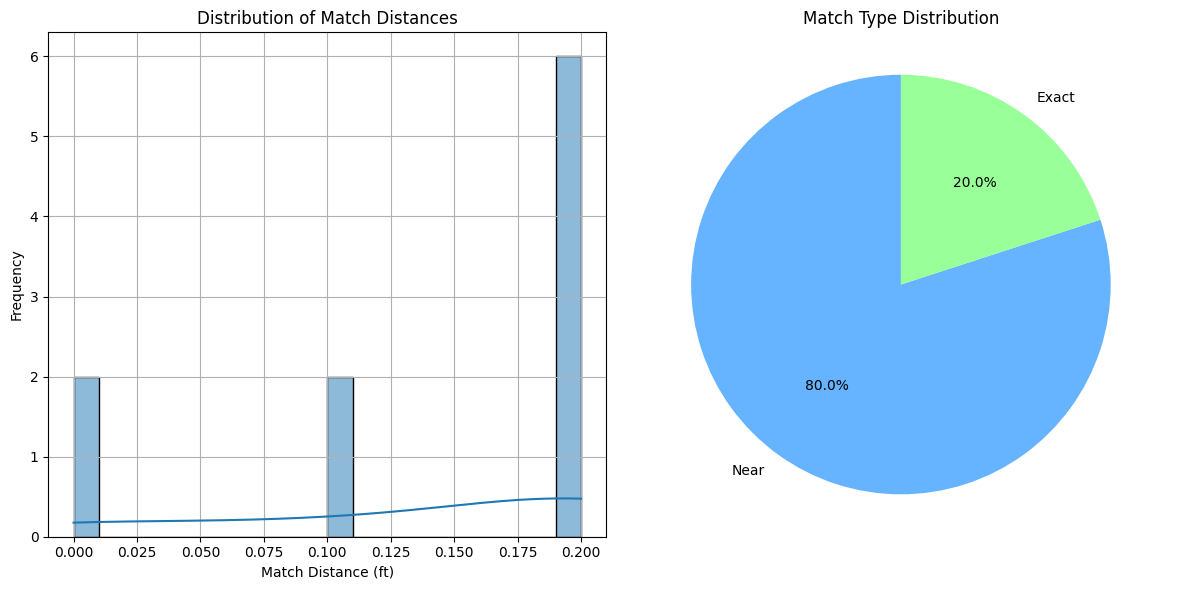

In [12]:
# Visualize the quality of matches
plt.figure(figsize=(12, 6))

# Left plot: Distance histogram
plt.subplot(1, 2, 1)
sns.histplot(joined['Distance'], bins=20, kde=True)
plt.xlabel('Match Distance (ft)')
plt.ylabel('Frequency')
plt.title('Distribution of Match Distances')
plt.grid(True)

# Right plot: Match types
plt.subplot(1, 2, 2)
match_counts = joined['Match_Type'].value_counts()
plt.pie(match_counts, labels=match_counts.index, autopct='%1.1f%%', 
        colors=['#66b3ff', '#99ff99'], startangle=90)
plt.axis('equal')
plt.title('Match Type Distribution')

plt.tight_layout()
plt.savefig('match_quality.png', dpi=300, bbox_inches='tight')
plt.show()

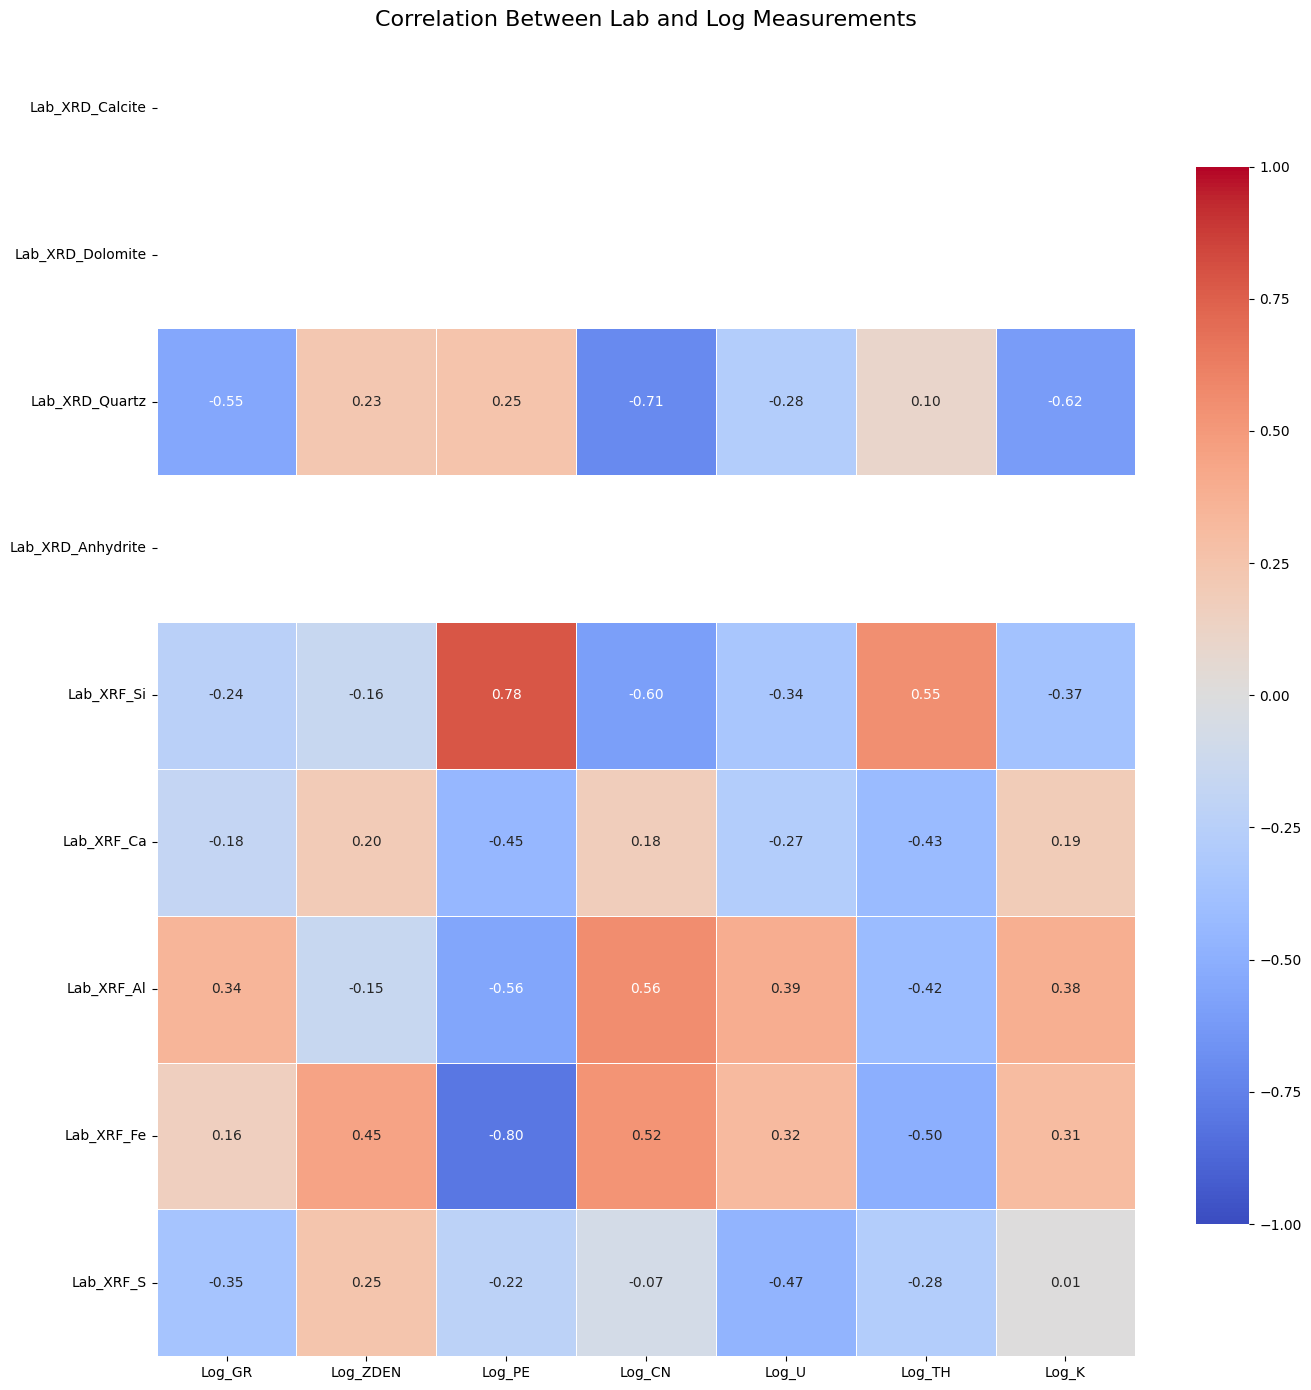

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Filter for all lab measurement columns (excluding non-measurement columns)
lab_vars = [col for col in joined.columns if col.startswith('Lab_') and 
           col not in ['Lab_Depth', 'Lab_Sample_ID']]

# Filter for all log measurement columns (excluding non-measurement or auxiliary columns)
log_vars = [col for col in joined.columns if col.startswith('Log_') and 
           col not in ['Log_Depth', 'Log_FRAMENO']]

# Filter out columns where all values are 0
lab_vars = [col for col in lab_vars if not (joined[col] == 0).all()]
log_vars = [col for col in log_vars if not (joined[col] == 0).all()]

# 31 - 10
print(len(lab_vars), "lab variables")
print("Lab variables:", lab_vars)
print(len(log_vars), "log variables")

# Compute correlation matrix (log variables as rows, lab variables as columns)
corr_matrix = joined[lab_vars + log_vars].corr().loc[log_vars, lab_vars]

# Print correlations above 0.6 (absolute value)
high_corrs = corr_matrix[(corr_matrix.abs() > 0.6)]

print("\nCorrelations above 0.6 (absolute value):")
for log_var in high_corrs.index:
    for lab_var in high_corrs.columns:
        val = high_corrs.loc[log_var, lab_var]
        if abs(val) > 0.6:
            print(f"{log_var} vs {lab_var}: {val:.2f}")



# Create a larger figure for better readability
plt.figure(figsize=(24, 24))

# Plot the heatmap with rotated x-axis labels
sns.heatmap(corr_matrix, 
            annot=True,                  # Show correlation values
            cmap='RdYlGn',               # Use a diverging colormap
            vmin=-1, vmax=1,             # Fixed scale for correlation values
            linewidths=0.5,              # Add line separators
            fmt='.2f',                   # Format as 2 decimal places
            annot_kws={'size': 7},       # Smaller annotation font size
            cbar_kws={"shrink": 0.8})    # Adjust colorbar
            

#  labeling and styling
plt.title('Correlation Between Log Measurements (y-axis) and Lab Measurements (x-axis)', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=20)      
plt.yticks(fontsize=20)                   

# Add clearer axis labels
plt.xlabel('Lab Measurements', fontsize=25, )
plt.ylabel('Log Measurements', fontsize=25, )

plt.tight_layout()
plt.savefig('correlation_heatmap_comprehensive.png', dpi=300, bbox_inches='tight')
plt.show()